# Creating a Target Variable

In [1]:
## Python Core
import datetime
import re
import math
from IPython.display import Markdown as md

## Data manipulation
import pandas as pd
import numpy as np


## Data Vizualization
from pprint import pprint
from matplotlib import pyplot as plt
import seaborn as sns

## Scikit
from sklearn.preprocessing import MinMaxScaler




In [2]:
PROJECT_PATH = "E:/Projects/PyCharmProjects/credit_risk_analysis_adhoc"

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)
pd.set_option('display.float_format', '{:,.7f}'.format)
pd.set_option('display.max_colwidth', None)

## Choose Dates

In [4]:
quarters = {
    2014: range(1, 5),
    # 2015: range(1, 5),
    # 2016: range(1, 5),
    # 2017: range(1, 5),
    # 2018: range(1, 5),
    # 2019: range(1, 3),
}

## Import Loan Performance Data

In [5]:
def clean_feature_name(text):
    text = text.lower()
    text = re.sub(r"\(.*\)", "", text)
    text = re.sub(r"[^a-z]", " ", text)
    text = text.strip()
    text = re.sub(r"\s+", "_", text)
    return text

In [6]:
loan_perf_columns_original_format = """Loan Sequence Number
Monthly Reporting Period
Current Actual UPB
Current Loan Delinquency Status
Loan Age
Remaining Months to Legal Maturity
Defect Settlement Date
Modification Flag
Zero Balance Code
Zero Balance Effective Date
Current Interest Rate
Current Deferred UPB
Due Date of Last Paid Installment (DDLPI)
MI Recoveries
Net Sales Proceeds
Non MI Recoveries
Expenses
Legal Costs
Maintenance and Preservation Costs
Taxes and Insurance
Miscellaneous Expenses
Actual Loss Calculation
Modification Cost
Step Modification Flag
Deferred Payment Plan
Estimated Loan-to-Value (ELTV)
Zero Balance Removal UPB
Delinquent Accrued Interest
Delinquency Due to Disaster
Borrower Assistance Status Code
Current Month Modification Cost
Interest Bearing UPB"""
loan_perf_columns_original_format = loan_perf_columns_original_format.split("\n")
loan_performance_columns = [clean_feature_name(loan_performance_column) 
                            for loan_performance_column in loan_perf_columns_original_format]

In [7]:
loan_performance_files = [f"{PROJECT_PATH}/data/raw/freddie_mac/performance_data/historical_data_time_{year}Q{q}.txt" for year in quarters for q in quarters[year]]

print("Performance Files")
pprint(loan_performance_files)

Performance Files
['E:/Projects/PyCharmProjects/credit_risk_analysis_adhoc/data/raw/freddie_mac/performance_data/historical_data_time_2014Q1.txt',
 'E:/Projects/PyCharmProjects/credit_risk_analysis_adhoc/data/raw/freddie_mac/performance_data/historical_data_time_2014Q2.txt',
 'E:/Projects/PyCharmProjects/credit_risk_analysis_adhoc/data/raw/freddie_mac/performance_data/historical_data_time_2014Q3.txt',
 'E:/Projects/PyCharmProjects/credit_risk_analysis_adhoc/data/raw/freddie_mac/performance_data/historical_data_time_2014Q4.txt']


### Read Files

In [8]:
loan_performance_df = []
for loan_performance_filename in loan_performance_files:
    loan_performance_quarter_df = pd.read_csv(loan_performance_filename, 
                                              delimiter="|",
                                              header=None)
    loan_performance_df.append(loan_performance_quarter_df)
    
loan_performance_df = pd.concat(loan_performance_df, ignore_index=True)
loan_performance_df.columns = loan_performance_columns

C:\Users\ashwi\anaconda3\envs\Credit_Risk_Modeling\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (3,7,23,24,28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ashwi\anaconda3\envs\Credit_Risk_Modeling\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (3,7,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\ashwi\anaconda3\envs\Credit_Risk_Modeling\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (3,7,23,24,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
loan_performance_df["monthly_reporting_period"] = pd.to_datetime(loan_performance_df["monthly_reporting_period"], 
                                                                 format="%Y%m").dt.date
loan_performance_df.sort_values(by=["loan_sequence_number", "monthly_reporting_period"], inplace=True)

In [10]:
print(loan_performance_df.shape)
loan_performance_df.head()

(66798436, 32)


,loan_sequence_number,monthly_reporting_period,current_actual_upb,current_loan_delinquency_status,loan_age,remaining_months_to_legal_maturity,defect_settlement_date,modification_flag,zero_balance_code,zero_balance_effective_date,current_interest_rate,current_deferred_upb,due_date_of_last_paid_installment,mi_recoveries,net_sales_proceeds,non_mi_recoveries,expenses,legal_costs,maintenance_and_preservation_costs,taxes_and_insurance,miscellaneous_expenses,actual_loss_calculation,modification_cost,step_modification_flag,deferred_payment_plan,estimated_loan_to_value,zero_balance_removal_upb,delinquent_accrued_interest,delinquency_due_to_disaster,borrower_assistance_status_code,current_month_modification_cost,interest_bearing_upb
0,F14Q10000001,2014-04-01,"324,000.0000000",0,0,180,NaN,NaN,NaN,NaN,3.8750000,0.0000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"324,000.0000000"
1,F14Q10000001,2014-05-01,"322,000.0000000",0,1,179,NaN,NaN,NaN,NaN,3.8750000,0.0000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"322,000.0000000"
2,F14Q10000001,2014-06-01,"321,000.0000000",0,2,178,NaN,NaN,NaN,NaN,3.8750000,0.0000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"321,000.0000000"
3,F14Q10000001,2014-07-01,"320,000.0000000",0,3,177,NaN,NaN,NaN,NaN,3.8750000,0.0000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"320,000.0000000"
4,F14Q10000001,2014-08-01,"320,000.0000000",0,4,176,NaN,NaN,NaN,NaN,3.8750000,0.0000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"320,000.0000000"


## Missing data

In [11]:
missing_perf_data = pd.DataFrame({
    "count": loan_performance_df.isna().sum(),
    "pct": loan_performance_df.isna().mean()*100
})
missing_perf_data[missing_perf_data.pct>0]

,count,pct
defect_settlement_date,66796830,99.9975958
modification_flag,66538302,99.6105687
zero_balance_code,65940719,98.7159625
zero_balance_effective_date,65940719,98.7159625
due_date_of_last_paid_installment,66432900,99.4527776
mi_recoveries,66792396,99.9909579
net_sales_proceeds,66792368,99.9909160
non_mi_recoveries,66792396,99.9909579
expenses,66792396,99.9909579
legal_costs,66792396,99.9909579


## Current Loan Delinquency Status

In [12]:
delinquency_values = list(loan_performance_df["current_loan_delinquency_status"].unique())
delinquency_values.remove('RA')

delinquency_map = {val: int(val) for val in delinquency_values if isinstance(val, str)}
delinquency_map['RA'] = -1
delinquency_map['XX'] = None
delinquency_map['   '] = None

loan_performance_df.replace({"current_loan_delinquency_status": delinquency_map}, inplace=True)
loan_performance_df["current_loan_delinquency_status"] = loan_performance_df["current_loan_delinquency_status"].astype(int)

### Delinquency Rate

In [13]:
delinquent_loan_sequence_numbers = loan_performance_df[loan_performance_df.current_loan_delinquency_status > 0]["loan_sequence_number"].unique()
num_delinquent = len(delinquent_loan_sequence_numbers)
total_num_loans = loan_performance_df.loan_sequence_number.nunique()
pct_delinquent = num_delinquent*100/total_num_loans
print(f"We have {num_delinquent}/{total_num_loans} which is {pct_delinquent:,.2f}% delinquency")

We have 139090/1142377 which is 12.18% delinquency


## Create transition matrix

In [14]:
from dateutil import relativedelta
def diff_month(start, end):
    diff = relativedelta.relativedelta(end, start)
    diff_in_months = diff.months + diff.years * 12
    return diff_in_months

def state_to_num_days(state):
        if state >= 0:
            start = state*30
            end = (((state+1)*30)-1)
            return f"{start}-{end}"
        else:
            return 'RA'

In [15]:
def get_transition_matrix(loan_performance_df, num_months_ahead):
        
    def count_consective_states(loan_df):
        loan_states = loan_df["current_loan_delinquency_status"].tolist()
        loan_dates = loan_df["monthly_reporting_period"].tolist()
        for cur_state, nxt_state, cur_date, nxt_date in zip(loan_states, loan_states[num_months_ahead:], loan_dates, loan_dates[num_months_ahead:]):
            num_months = diff_month(cur_date, nxt_date)
            # if nxt_state-cur_state > 0 and int(nxt_state-cur_state) != int(num_months):
            #     print(int(nxt_state-cur_state), int(num_months))
            # nxt_state = int(cur_state + num_months)
            states.add(cur_state)
            states.add(nxt_state)

            if (cur_state, nxt_state) not in transition_counts:
                transition_counts[(cur_state, nxt_state)] = 0
            transition_counts[(cur_state, nxt_state)] += 1
            
    states = set()
    transition_counts = {}
    _ = loan_performance_df.groupby("loan_sequence_number").apply(count_consective_states)
    
    states = sorted(list(states))
    
    transition_matrix = [[transition_counts.get((cur_state, nxt_state), 0) for nxt_state in states] for cur_state in states]    
    
    
    
    
    states = [state_to_num_days(state) for state in states]
    
    transition_matrix_df = pd.DataFrame(transition_matrix, 
                                        index = states,
                                        columns = states)
    
    return states, transition_matrix_df
    
    
    
    

In [16]:
def plot_transition_matrix(transition_matrix_df, highly_delinquent_state, collapse_highly_delinquent=False):
    transition_matrix_df = transition_matrix_df.copy()
    
    if collapse_highly_delinquent:
        highly_delinquent_days = state_to_num_days(highly_delinquent_state).split("-")[0]
        highly_delinquent_days = f">={highly_delinquent_days}"
        
        ### Delinquent_col
        #### Sum cols > highly_delinquent_state
        highly_delinquent_col = transition_matrix_df.iloc[:, highly_delinquent_state+1:].T.sum()
        #### Remove cols > highly_delinquent_state
        transition_matrix_df = transition_matrix_df.iloc[:,:highly_delinquent_state+1]
        #### add sum(cols > highly_delinquent_state)
        transition_matrix_df[highly_delinquent_days] = highly_delinquent_col

        #### Sum rows > highly_delinquent_state
        highly_delinquent_row = transition_matrix_df.iloc[highly_delinquent_state+1:, :].sum()
        #### Remove rows > highly_delinquent_state
        transition_matrix_df = transition_matrix_df.head(highly_delinquent_state+1)
        #### add sum(rows > highly_delinquent_state)
        transition_matrix_df = transition_matrix_df.append(highly_delinquent_row, ignore_index=True)

        #### Reset index
        transition_matrix_df.index = transition_matrix_df.columns
    else:
        transition_matrix_df = transition_matrix_df.iloc[:highly_delinquent_state+1, :highly_delinquent_state+1]
        
    transition_matrix_normalized_df = transition_matrix_df.div(transition_matrix_df.T.sum(), axis=0)
    
    
    fig, ax = plt.subplots(figsize=(2*highly_delinquent_state, highly_delinquent_state/2)) 
    
    ax = sns.heatmap(transition_matrix_normalized_df,
                     annot=transition_matrix_df,
                     fmt='g',
                     ax=ax,
                     cmap="Purples")
    ax.xaxis.tick_top()
    plt.xticks(rotation = 90) 
    plt.show()

## Display Transition Matrix

### 1 month look ahead

In [17]:
states_1m, transition_matrix_1m_df = get_transition_matrix(loan_performance_df, num_months_ahead=1)

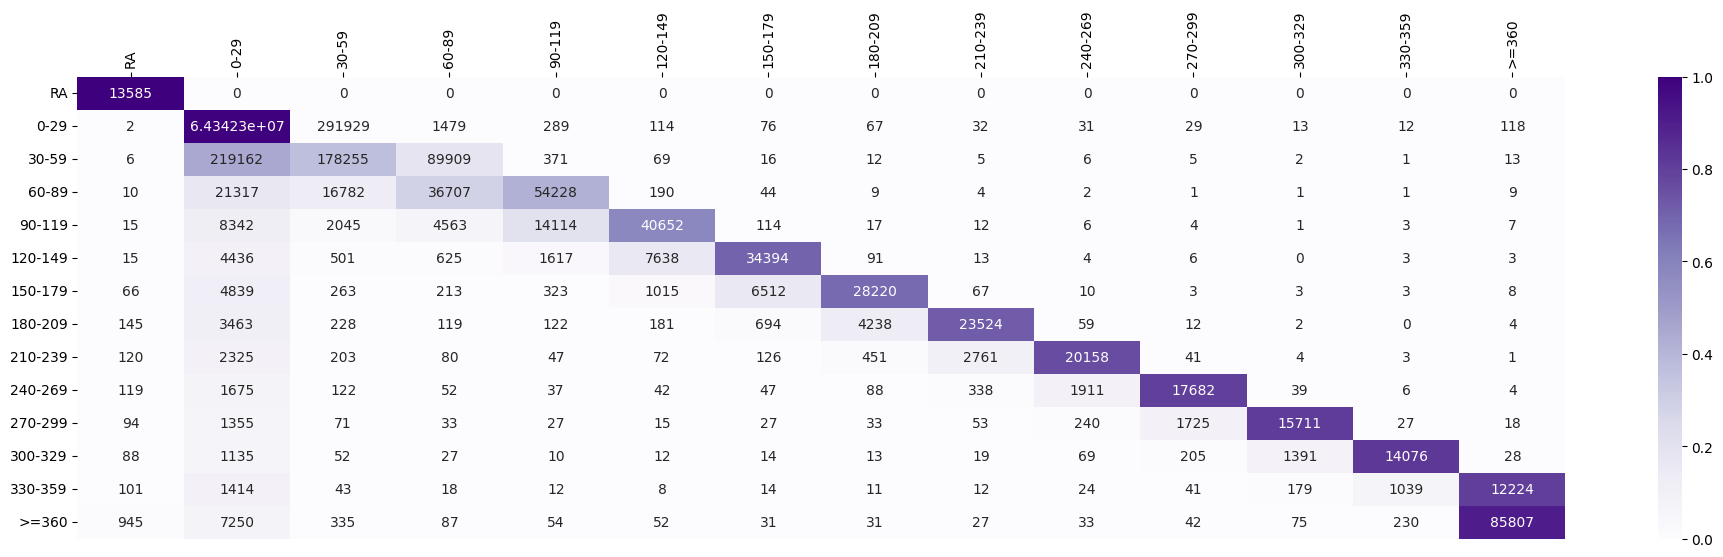

In [18]:
plot_transition_matrix(transition_matrix_1m_df, 
                       highly_delinquent_state=12,
                       collapse_highly_delinquent=True)

### 3 months look ahead

In [19]:
states_3m, transition_matrix_3m_df = get_transition_matrix(loan_performance_df, num_months_ahead=3)

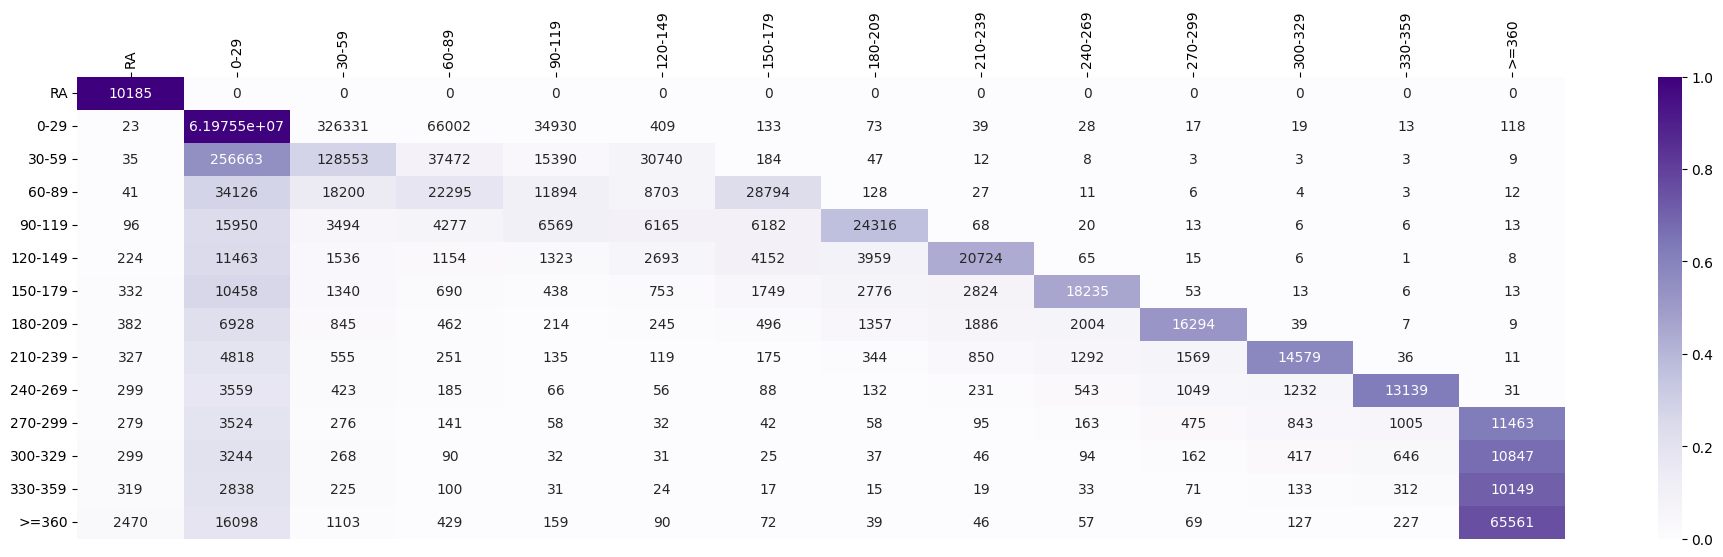

In [20]:
plot_transition_matrix(transition_matrix_3m_df, 
                       highly_delinquent_state=12,
                       collapse_highly_delinquent=True)

### 6 months look ahead

In [21]:
states_6m, transition_matrix_6m_df = get_transition_matrix(loan_performance_df, num_months_ahead=6)

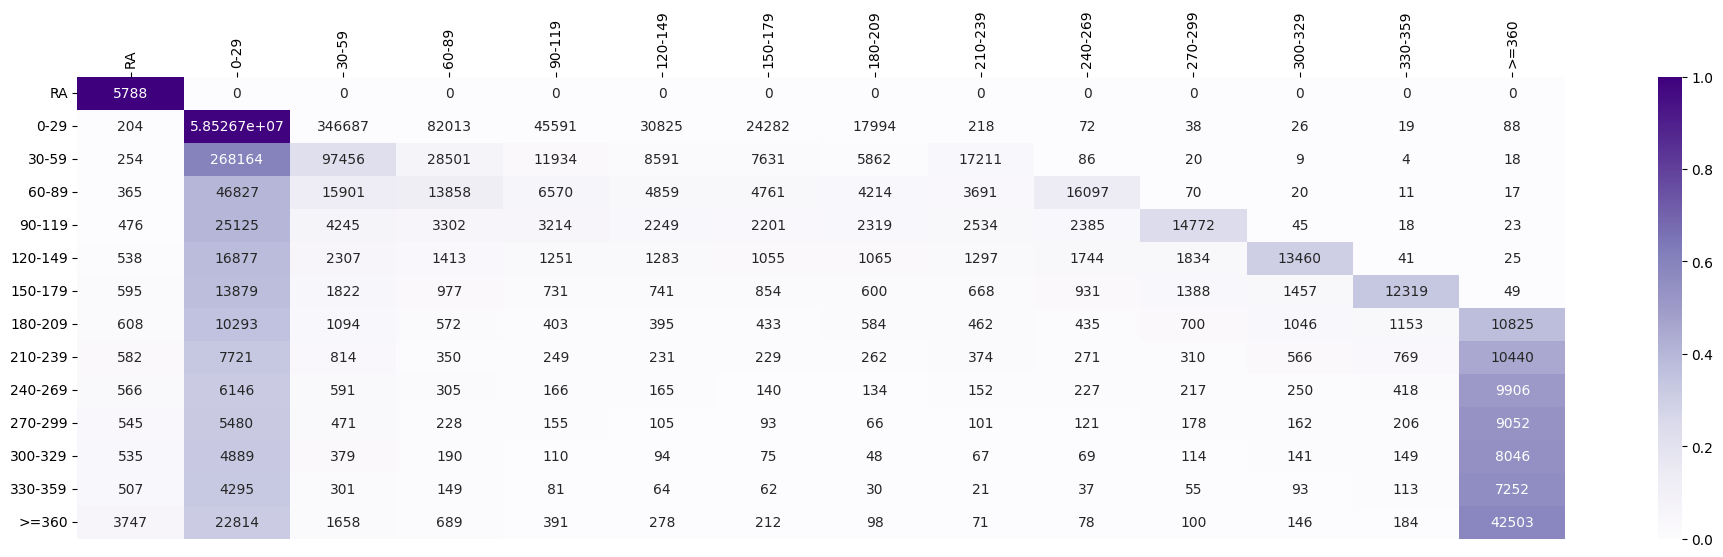

In [22]:
plot_transition_matrix(transition_matrix_6m_df,
                       highly_delinquent_state=12,
                       collapse_highly_delinquent=True)